In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns #biblio de visalusation plus puissante que matplot
import matplotlib.pyplot as plt
%matplotlib inline 
import pymysql.cursors
from pymongo import MongoClient
# %%matplotlib inline pour visualiser le graphe sous jupyter 

In [2]:
client     = MongoClient()
db         = client.SFM

# db.comptabilisationavpsfm.aggregate({
#   "_id": "$adherent_avp_id",
#   "records": {
#     "$addToSet": "$$ROOT"
#   }
# })

import pprint
adherentLIST=(list(db.comptabilisationavpsfm.aggregate([{"$group":
  {"_id": "$adherent_avp_id",
  "records": {"$addToSet": "$$ROOT" }
  }
}])))

# cur = db.comptabilisationavpsfm.find({},{'date_cotisation':1,'date_comptabilisation':1,'solde':1,'compteDebit':1,'compteCredit':1,'date_limit_cotisation':1,'_id':False})
# print("{} ligne trouvés".format(db.comptabilisationavpsfm.count_documents({})))

 

In [3]:
adherentLIST

[{'_id': '2625',
  'records': [{'_id': 'imfhqdutgw',
    'id': '11170',
    'classe_comptabilite_avp_id': '2625',
    'adherent_avp_id': '2625',
    'montant_cotisation': '29450.0',
    'date_cotisation': '2018-10-01',
    'date_comptabilisation': '2019-03-11 12:02:08',
    'trimestre': 'Trimestre 4',
    'solde': '0.0',
    'compteDebit': '0.0',
    'compteCredit': '29450.0',
    'date_limit_cotisation': '2018-12-31',
    'decaisse': '0'},
   {'_id': 'wbmhyrjdgu',
    'id': '11169',
    'classe_comptabilite_avp_id': '2625',
    'adherent_avp_id': '2625',
    'montant_cotisation': '29450.0',
    'date_cotisation': '2018-07-01',
    'date_comptabilisation': '2019-03-11 12:02:08',
    'trimestre': 'Trimestre 3',
    'solde': '0.0',
    'compteDebit': '0.0',
    'compteCredit': '29450.0',
    'date_limit_cotisation': '2018-09-30',
    'decaisse': '0'},
   {'_id': 'qmizsxjooo',
    'id': '11168',
    'classe_comptabilite_avp_id': '2625',
    'adherent_avp_id': '2625',
    'montant_cotisati

In [4]:
# list of labels
# labels = {
#   0: "bad",
#   1: "decent",
#   2: "good",
#   3: "very good",
# }
labels = {
  0: "bad",
  1: "good",
}

In [5]:
def giveColumnLabel(dateCotisation, dateLimite, datePaid):
  if datePaid > dateLimite :
    return 0

  rangeValue = ((dateLimite - dateCotisation)/3)
  range1 = dateCotisation+rangeValue
  range2 = dateLimite-rangeValue

  if datePaid < range1 :
    return 1
  elif (datePaid > range1 ) and (datePaid < range2):
    return 1
  else:
    return 1

# giveColumnLabel(1586815200000,1597510513407, 1597356000000)

In [6]:
import time as timelibrary
import datetime

rows = []
for item in adherentLIST:     
    item_row = item['records'] 
    time = item['_id'] 
      
    for row in item_row: 
        row['_id']= time
        # formatting dates to timestamp
        row['date_cotisation'] = timelibrary.mktime(datetime.datetime.strptime(row['date_cotisation'], "%Y-%m-%d").timetuple()) 
        row['date_comptabilisation'] = timelibrary.mktime(datetime.datetime.strptime(row['date_comptabilisation'], "%Y-%m-%d %H:%M:%S").timetuple()) 
        row['date_limit_cotisation'] = timelibrary.mktime(datetime.datetime.strptime(row['date_limit_cotisation'], "%Y-%m-%d").timetuple()) 
        row['date_duration'] = (row['date_limit_cotisation'] + row['date_cotisation']  ) - row['date_comptabilisation'] 
        row['deadline_respected'] = 1 if row['date_comptabilisation'] > row['date_cotisation'] and row['date_comptabilisation'] < row['date_limit_cotisation']  else 0
        row['paid_all_debts'] = 1 if row['compteCredit'] == '0.0' else 0
        row['label'] = giveColumnLabel(row['date_cotisation'],row['date_limit_cotisation'],row['date_comptabilisation'])

        # removing unnecessary columns
        del row['adherent_avp_id']
        if row.get('decaisse'):
            del row['decaisse']
        del row['solde']
        

        rows.append(row)  
        

In [7]:
df = pd.DataFrame(rows)
df_train = df
df_validation = df[:3000]

df_train.sample(20)

,_id,id,classe_comptabilite_avp_id,montant_cotisation,date_cotisation,date_comptabilisation,trimestre,compteDebit,compteCredit,date_limit_cotisation,date_duration,deadline_respected,paid_all_debts,label
301,2509,10695,2509,29450.0,1.514761e+09,1.531177e+09,Trimestre 1,29450.0,0.0,1.522451e+09,1.506035e+09,0,1,0
2923,1750,7580,1750,29450.0,1.514761e+09,1.555599e+09,Trimestre 1,0.0,29450.0,1.522451e+09,1.481613e+09,0,0,0
961,2213,9488,2213,29450.0,1.530400e+09,1.524697e+09,Trimestre 3,0.0,29450.0,1.538262e+09,1.543964e+09,0,0,1
7756,1287,5521,1287,29450.0,1.514761e+09,1.514243e+09,Trimestre 1,29450.0,0.0,1.522451e+09,1.522969e+09,0,1,1
11008,1378,5979,1378,29450.0,1.522537e+09,1.535497e+09,Trimestre 2,0.0,29450.0,1.530313e+09,1.517353e+09,0,0,0
2954,1387,6025,1387,29450.0,1.530400e+09,1.538521e+09,Trimestre 3,0.0,29450.0,1.538262e+09,1.530140e+09,0,0,0
1245,2109,9047,2109,29450.0,1.522537e+09,1.551354e+09,Trimestre 2,29450.0,0.0,1.530313e+09,1.501497e+09,0,1,0
6117,869,3659,869,29450.0,1.538348e+09,1.525734e+09,Trimestre 4,0.0,29450.0,1.546211e+09,1.558825e+09,0,0,1
1315,2084,8945,2084,29450.0,1.514761e+09,1.539299e+09,Trimestre 1,29450.0,0.0,1.522451e+09,1.497913e+09,0,1,0
5056,808,3398,808,29450.0,1.514761e+09,1.513638e+09,Trimestre 1,29450.0,0.0,1.522451e+09,1.523574e+09,0,1,1


In [8]:
df_train['label'].value_counts()

0    6755
1    4362
Name: label, dtype: int64

## Support vector machines (SVM)

In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X_train, X_test, y_train, y_test = train_test_split(df_train['date_duration'],df_train['label'],test_size=0.3)

In [10]:
clf = SVC(gamma='auto')
clf.fit(X_train.values.reshape(-1, 1), y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [11]:
clf.score(X_test.values.reshape(-1, 1), y_test)

0.9295563549160671

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [13]:
y_pred = clf.predict(X_test.values.reshape(-1, 1))
f1_score(y_test, y_pred, average='macro')

0.9250617053709889

In [14]:
accuracy_score(y_test, y_pred)

0.9295563549160671

In [15]:
recall_score(y_test, y_pred, average='weighted')

0.9295563549160671

In [16]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    fig, ax = plt.subplots(figsize=(5, 5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    plt.ylim(1.5,-0.5)

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization


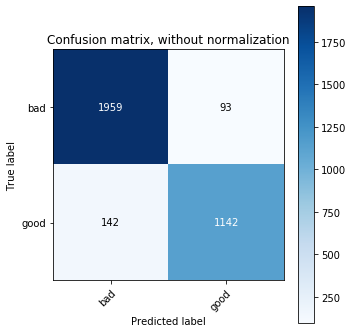

In [17]:
# confusion_matrix(y_test, y_pred, labels=["unknown","management", "support", "prod"])
# 0: "bad",
# 1: "decent",
# 2: "good",
# 3: "very good",
matrix = plot_confusion_matrix(y_test, y_pred.round(), classes=['bad','good'],
                      title='Confusion matrix, without normalization', normalize=False)

In [18]:
to_pred = 123
x = np.array([to_pred])
print(clf.predict(x.reshape(-1, 1)))
# predict_probablity = clf.predict_proba(x.reshape(-1, 1))
# predict_probablity

[0]


## NAIVE BAYES

In [19]:
>>> from sklearn.datasets import load_iris
>>> from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(df_train['date_duration'],df_train['label'],test_size=0.3)

In [20]:
gnb = GaussianNB()

In [21]:
 y_pred = gnb.fit(X_train.values.reshape(-1, 1), y_train).predict(X_test.values.reshape(-1, 1))

In [22]:
f1_score(y_test, y_pred, average='weighted')

0.8030994288691287

In [23]:
accuracy_score(y_test, y_pred)

0.8030575539568345

In [24]:
recall_score(y_test, y_pred, average='weighted')

0.8030575539568345

Confusion matrix, without normalization


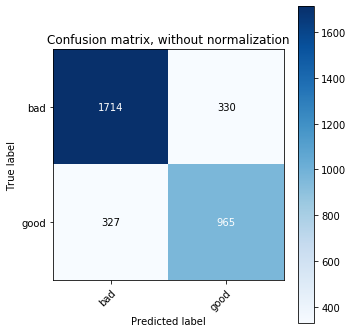

In [25]:
matrix = plot_confusion_matrix(y_test, y_pred.round(), classes=['bad','good'],
                      title='Confusion matrix, without normalization', normalize=False)

## Logistic regression

In [26]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(df_train['date_duration'],df_train['label'],test_size=0.3)

In [27]:
log = LogisticRegression(solver='saga', max_iter= 1000, class_weight = 'balanced').fit(X_train.values.reshape(-1, 1), y_train)

In [28]:
log.score(X_test.values.reshape(-1, 1), y_test)

0.39538369304556353

In [29]:
y_pred = clf.predict(X_test.values.reshape(-1, 1))
f1_score(y_test, y_pred)

0.9070574623987661

In [30]:
accuracy_score(y_test, y_pred)

0.927757793764988

In [31]:
recall_score(y_test, y_pred, average='weighted')

0.927757793764988

Confusion matrix, without normalization


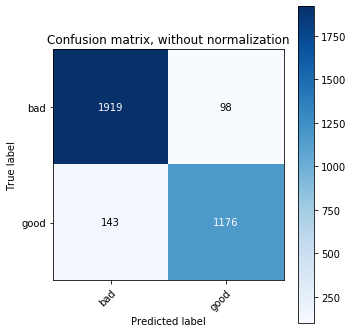

In [32]:
matrix = plot_confusion_matrix(y_test, y_pred.round(), classes=['bad','good'],
                      title='Confusion matrix, without normalization', normalize=False)

### The SVM Classfier shows the best metrics

In [33]:
# dumping the classifier
import pickle
pickle.dump(clf, open('model.pickle','wb'))

**adding the SVM classes to our DF**

In [34]:
for index, row in df_train.iterrows():
    x = np.array([row['date_duration']])
    empty_preds = clf.predict(x.reshape(-1, 1))
#     predict_probablity = clf.predict_proba(vec)
#     row['confidence'] = predict_probablity.max(axis=1)
    df_train.at[index,'class']  = [labels[i] for i in empty_preds][0]
#     df_new.at[index,'confidence']  = predict_probablity.max(axis=1)

In [35]:
df_train.sample(20)

,_id,id,classe_comptabilite_avp_id,montant_cotisation,date_cotisation,date_comptabilisation,trimestre,compteDebit,compteCredit,date_limit_cotisation,date_duration,deadline_respected,paid_all_debts,label,class
8627,2471,10540,2471,29450.0,1.530400e+09,1.556523e+09,Trimestre 3,0.0,29450.0,1.538262e+09,1.512139e+09,0,0,0,bad
9344,1594,6956,1594,29450.0,1.514761e+09,1.517526e+09,Trimestre 1,29450.0,0.0,1.522451e+09,1.519686e+09,1,1,1,good
9549,577,2405,577,29450.0,1.530400e+09,1.543792e+09,Trimestre 3,0.0,29450.0,1.538262e+09,1.524870e+09,0,0,0,bad
1597,2545,10845,2545,29450.0,1.538348e+09,1.570538e+09,Trimestre 4,29450.0,0.0,1.546211e+09,1.514021e+09,0,1,0,bad
2805,1518,6655,1518,29450.0,1.538348e+09,1.527462e+09,Trimestre 4,0.0,29450.0,1.546211e+09,1.557097e+09,0,0,1,good
1263,2102,9020,2102,29450.0,1.538348e+09,1.539644e+09,Trimestre 4,29450.0,0.0,1.546211e+09,1.544915e+09,1,1,1,good
2198,1664,7237,1664,29450.0,1.522537e+09,1.565780e+09,Trimestre 2,0.0,29450.0,1.530313e+09,1.487070e+09,0,0,0,bad
364,2484,10595,2484,29450.0,1.522537e+09,1.553880e+09,Trimestre 2,0.0,29450.0,1.530313e+09,1.498970e+09,0,0,0,bad
2928,1398,6077,1398,29450.0,1.506812e+09,1.521673e+09,Trimestre 4,0.0,29450.0,1.514675e+09,1.499814e+09,0,0,0,bad
7753,1191,5038,1191,29450.0,1.514761e+09,1.516921e+09,Trimestre 1,29450.0,0.0,1.522451e+09,1.520291e+09,1,1,1,good


In [36]:
for index, row in df_train.iterrows():
#     print(row['id'], row['_id'], row['trimestre'], row['class'])
    db.comptabilisationavpsfm.update_one({'id': row['id']},{'$set':{'class': row['class']}})

In [37]:
adherentNew =(list(db.comptabilisationavpsfm.aggregate([{"$group":
  {"_id": "$adherent_avp_id",
  "records": {"$addToSet": "$$ROOT" }
  }
}])))

In [38]:
from collections import Counter
def Calculatescore(dict):
    semesterClasses = []
    for semester in dict:
        semesterClasses.append(semester['class'])
    length = len(semesterClasses)
    goodNum = Counter(semesterClasses)['good']
    score = goodNum / length
    db.adherentavpsfm.update_one({'id': semester['id']},{'$set':{'credibility': score}})

In [39]:
for adherent in adherentNew:
    Calculatescore(adherent['records'])
    
